In [2]:
from utilities import *
from securespectra_utils import *
import matplotlib.pyplot as plt
from IPython.display import Audio

In [12]:
audio_mfccs = np.load("/home/obiwan/training_mels_librispeech/trainingMels.npy")
label = np.load("/home/obiwan/training_mels_librispeech/trainingY.npy")[0]
mfcc = audio_mfccs[0,:,:]

print(mfcc.shape)
print(label)

(128, 256)
0


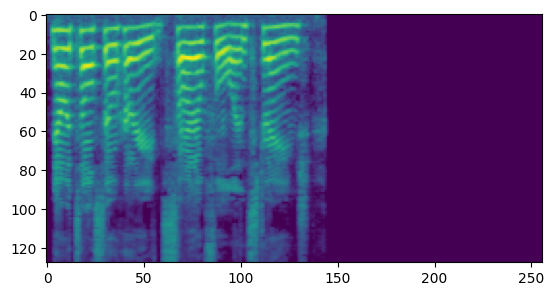

In [13]:
plt.imshow(mfcc)

In [6]:
input_audio= librosa.feature.inverse.mel_to_audio(librosa.db_to_power(mfcc),sr=24000)
print(len(input_audio))

<class 'numpy.ndarray'>
130560


In [14]:
Audio(data=input_audio, rate=24000, autoplay=True)

In [10]:
output_audio = librosa.feature.inverse.mel_to_audio(librosa.db_to_power(output_mfcc),sr=24000)
print(len(output_audio))

<class 'numpy.ndarray'>
130560


In [11]:
Audio(data=output_audio, rate=24000, autoplay=True)

MFCC normalized

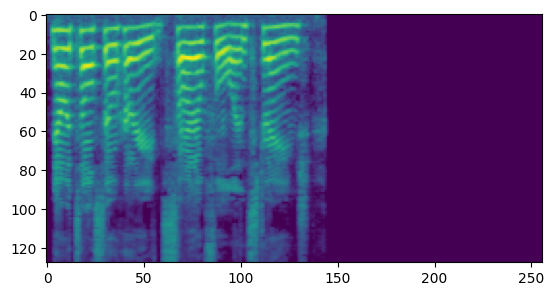

In [7]:
mfccmax = np.max(mfcc)
mfccmin = np.min(mfcc)
mfcc = mfcc_normalize(mfcc)
plt.imshow(mfcc)

In [8]:
output_mfcc = load_and_infer(mfcc, "/home/obiwan/repos/watermarking_module/libri_experiments/best_model_sign_libri.pt").cpu().squeeze().squeeze().numpy()
output_mfcc = mfcc_denormalize(output_mfcc, mfccmin, mfccmax)

input shape: torch.Size([1, 1, 128, 256])


In [46]:
output_mfcc = load_and_infer(mfcc, "best_model_sign_9.pt").cpu().squeeze().squeeze().numpy()
output_mfcc = mfcc_denormalize(output_mfcc, mfccmin, mfccmax)

input shape: torch.Size([1, 1, 128, 256])


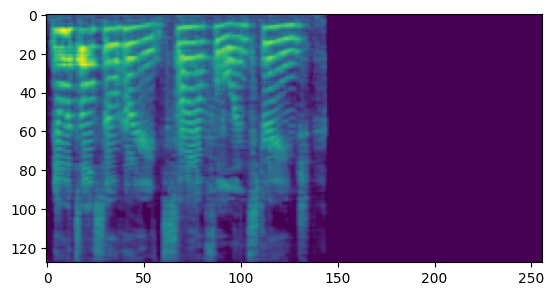

In [9]:
plt.imshow(output_mfcc)

In [28]:
audio = 10
original_mfcc = np.load("/home/obiwan/repos/watermarking_module/mel_spectograms/original_clients/0b42e481ca5fb9dc870188e2ff04095607aa1f2c3d58481350b9aa5be9748bac9337cdff30c1f0a48c79e7d01237f93192441f576afc842c8b33f642b4830561_mel_spectrograms.npy")
original_mfcc = original_mfcc[audio]
cloned_mfcc = np.load("/home/obiwan/repos/watermarking_module/mel_spectograms/cloned_clients/0b42e481ca5fb9dc870188e2ff04095607aa1f2c3d58481350b9aa5be9748bac9337cdff30c1f0a48c79e7d01237f93192441f576afc842c8b33f642b4830561_mel_spectrograms.npy")
cloned_mfcc = cloned_mfcc[audio]

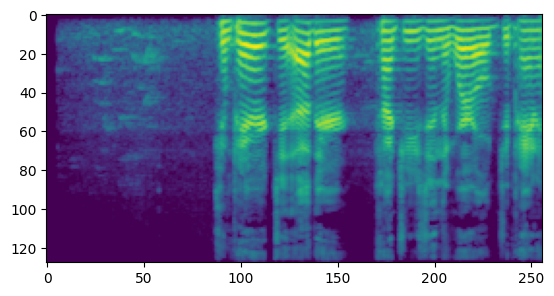

In [29]:
plt.imshow(original_mfcc)

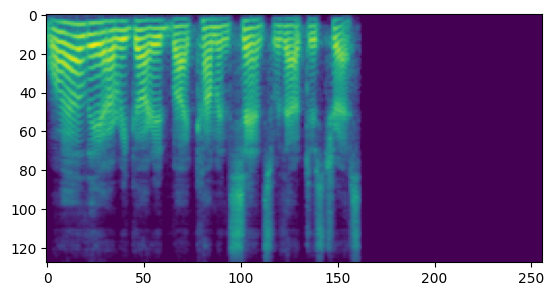

In [30]:
plt.imshow(cloned_mfcc)

In [32]:
input_audio= librosa.feature.inverse.mel_to_audio(librosa.db_to_power(original_mfcc),sr=24000)
Audio(data=input_audio, rate=24000, autoplay=True)

<class 'numpy.ndarray'>


In [33]:
input_audio= librosa.feature.inverse.mel_to_audio(librosa.db_to_power(cloned_mfcc),sr=24000)
Audio(data=input_audio, rate=24000, autoplay=True)

<class 'numpy.ndarray'>


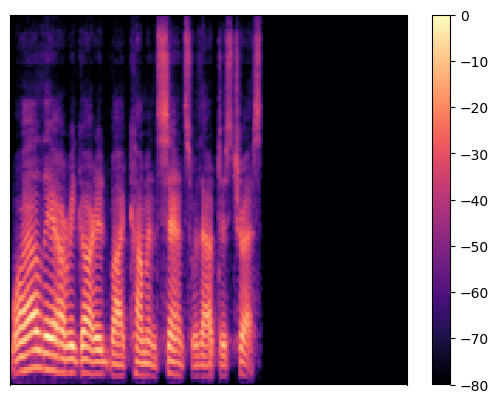

In [34]:
plt.figure()
librosa.display.specshow(cloned_mfcc)
plt.colorbar()

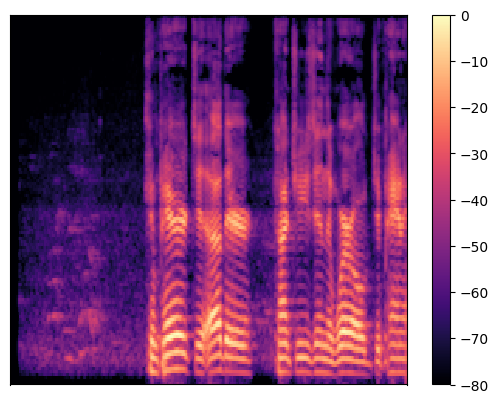

In [35]:
plt.figure()
librosa.display.specshow(original_mfcc)
plt.colorbar()

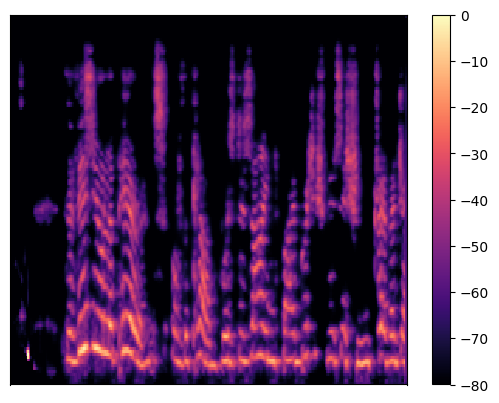

In [36]:
plt.figure()
librosa.display.specshow(output_mfcc)
plt.colorbar()

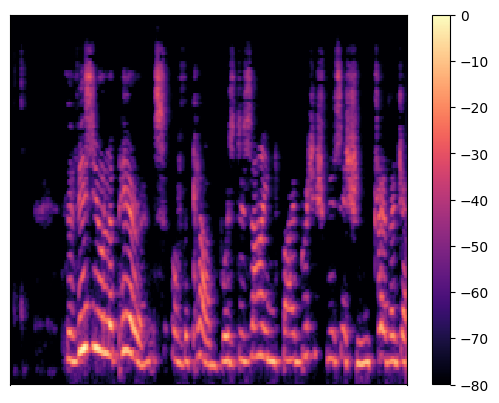

In [39]:
plt.figure()
librosa.display.specshow(mfcc)
plt.colorbar()

### Paper Figure

#### get input data

In [10]:
import audio_process as ap
import librosa
import matplotlib.pyplot as plt

In [8]:
audio_path = "/home/obiwan/repos/watermarking_module/common_voice_en_2582.mp3"
audio, sr = librosa.load(audio_path, sr=24000)
audio = ap.get_five_sec(audio,5.44)
input_mel = ap.get_spectogram(audio,sr)

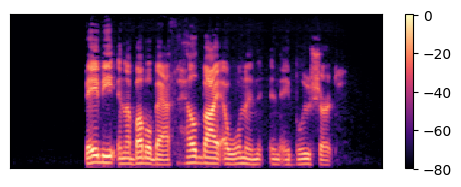

In [20]:
plt.figure(figsize=(6,2))
librosa.display.specshow(input_mel)
plt.colorbar()

#### get the signed version

In [13]:
input_mel_normalized = mfcc_normalize(input_mel)
mfccmax = np.max(input_mel)
mfccmin = np.min(input_mel)
output_mel = load_and_infer(input_mel_normalized, "/home/obiwan/repos/watermarking_module/pretrained_models/signature_model.pt").cpu().squeeze().squeeze().numpy()
output_mel = mfcc_denormalize(output_mel, mfccmin, mfccmax)


input shape: torch.Size([1, 1, 128, 256])


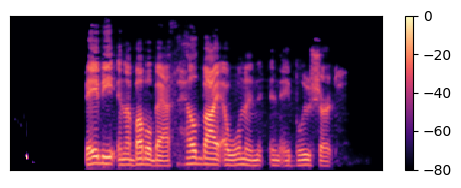

In [19]:
plt.figure(figsize=(6,2))
librosa.display.specshow(output_mel)
plt.colorbar()

#### get the cloned version

In [27]:
audio_path = "/home/obiwan/repos/watermarking_module/paper_fig_clone_1.wav"
audio, sr = librosa.load(audio_path, sr=24000)
# audio = ap.get_five_sec(audio,5.44)
input_mel = ap.get_spectogram(audio,sr)

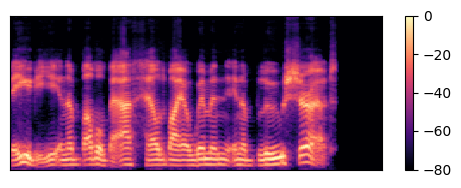

In [28]:
plt.figure(figsize=(6,2))
librosa.display.specshow(input_mel)
plt.colorbar()

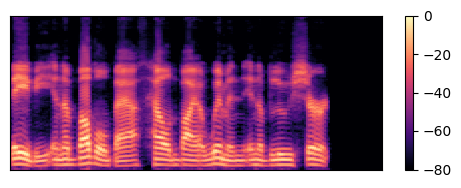

In [26]:
plt.figure(figsize=(6,2))
librosa.display.specshow(input_mel)
plt.colorbar()

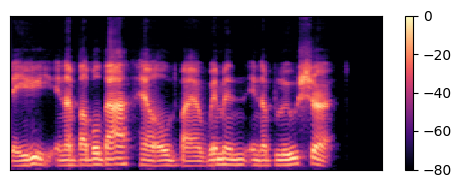

In [24]:
plt.figure(figsize=(6,2))
librosa.display.specshow(input_mel)
plt.colorbar()

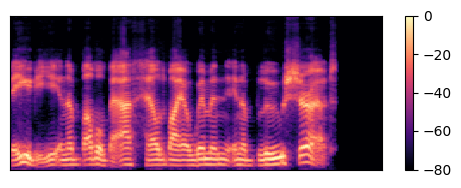

In [22]:
plt.figure(figsize=(6,2))
librosa.display.specshow(input_mel)
plt.colorbar()